## import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## functions

In [2]:
# angle btw 2 vectors
def angle(a, b):
    return 360 * np.arccos(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))) / (2 * np.pi)

# altitude
def height(p):
    return np.linalg.norm(p) - radius

# Mars atmospheric density variation 
def rho(h):
    if h < 100000: 
        return 10 ** (-6.5 + (4.85 * (100 - (h / 1000)) / 100))
    else:
        return 10 ** (-10 + (3 * (140 - (h / 1000)) / 40))

# g-force 
def g(p, mu):
    return -mu * p / (np.linalg.norm(p) ** 3)

# drag force
def drag(h, A, Cd, v):
    return rho(h) * A * Cd * v * np.linalg.norm(v) / 2

## parameters

In [3]:
M = 0.64171e24 # Mass of Mars
m = 2e5 # Mass of craft
mu = 6.67e-11 * M # gravitational parameter
radius = 3389500 # radius of Mars
p = np.array([3.61e6, -3e6, 0.]) # initial Starship position
v = np.array([0, 7e3, 0]) # initial Starship velocity
a = np.zeros(3) # initial Starship acceleration
A = np.pi * 4.7 * 50 # Starship area 
Cd = 3 # Drag coefficient 
dt = 0.001 # time increment
x = np.arange(0, 2 * np.pi, 0.0001) # plot Mars :D
px, py = [], [] # Starship x and y coordinates
vs, h, acc = [], [], [] # Starship velocity, altitude and acceleration
bfheight = 2000 # belly flop height
iterations = 550000 # iterations
timesteps = np.arange(0, iterations * dt, dt)

## simulate

In [4]:
for i in range(iterations):
    p += v * dt # update position
    px.append(p[0]) # track x
    py.append(p[1]) # track y
    h.append(height(p)) # calculate altitude
    a = g(p, mu) - drag(h[-1], A, Cd, v) / m # calculate acceleration
    acc.append(np.linalg.norm(a)) # track acceleration
    v += a * dt # update velocity
    vs.append(np.linalg.norm(v)) # track velocity
    vperp = (vs[-1] * np.array([-p[1], p[0], 0.])).sum() / (h[-1] + radius)
    if h[-1] < bfheight: # stop sim at alt <= bfheight - check if belly flop or bust
        if vperp <= 10: 
            print("belly flop but crash!")
        else:
            print("no flop and crash!")
        break
    else:
        if vperp <= 10:
            print("belly flop and land!")
            break
        else:
            continue

no flop and crash!


## results

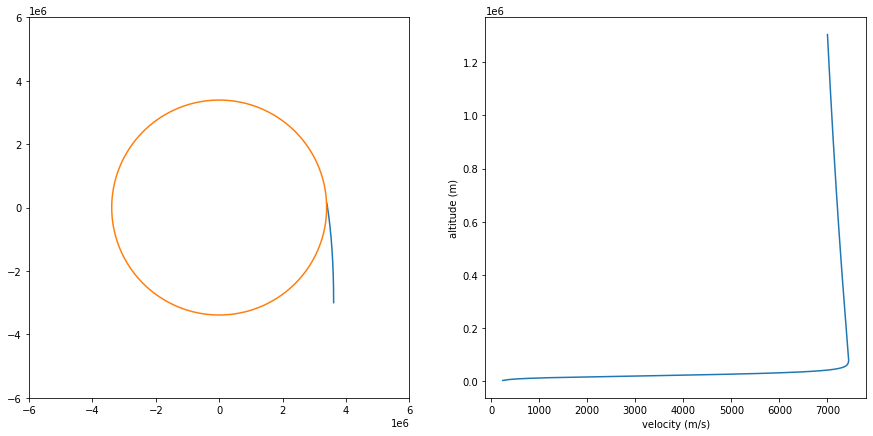

alt: 1999.9676031800918m
v: 244.94727035625158m/s
v-perp wrt gr: 234.0464513117351m/s
v-angle wrt p: 128.11367524086373
acc: 4.680848481232415m/s^2
peak g: 17.683481497796606g
peak g alt: 24598.250259786844m
flight time: 521.544s


In [5]:
fig = plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.xlim([-6e6, 6e6])
plt.ylim([-6e6, 6e6])
plt.plot(px, py)
plt.plot(radius * np.cos(x), radius * np.sin(x))
plt.subplot(1, 2, 2)
plt.xlabel("velocity (m/s)")
plt.ylabel("altitude (m)")
plt.plot(vs, h)
plt.show()
print(f"alt: {h[-1]}m")
print(f"v: {vs[-1]}m/s")
print(f"v-perp wrt gr: {vperp}m/s")
print(f"v-angle wrt p: {angle(p, v)}")
print(f"acc: {acc[-1]}m/s^2")
print(f"peak g: {max(acc) / 9.81}g")
print(f"peak g alt: {h[np.argmax(acc)]}m")
print(f"flight time: {i * dt}s")